# Séance 3: KNN

#### Import des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Ouvrir les données

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### On garde les colonnes utiles

In [4]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1], inplace=True) #female 1 male 0
titanic.head()

C:\Users\rymkm\AppData\Local\Temp\ipykernel_8112\3508724714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0,inplace=True)
C:\Users\rymkm\AppData\Local\Temp\ipykernel_8112\3508724714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'].replace(['male','female'],[0,1], inplace=True) #female 1 male 0


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


#### Charger le modele avec sklearn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#### Features et target x et y

In [6]:
y = titanic['survived']
x = titanic.drop('survived', axis=1)

#### Initialiser le modèle et Entrainer le modele

In [7]:
model.fit(x,y)
model.score(x,y) #précision attention la précision n'est pas l'accuracy 

0.8417366946778712

#### Prédire 

In [10]:
def survive(model,pclass,sex,age):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
survive(model,pclass=2,sex=1,age=24) # appel: classe 2 femme 24 ans

[1]


c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Choisir le K optimal
en utilisant l'hyper paramètre

In [12]:
score_dic = {}
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x,y)
    score = model.score(x,y)
    score_dic[i] = score
score_dic

{1: 0.8739495798319328,
 2: 0.84593837535014,
 3: 0.8627450980392157,
 4: 0.8403361344537815,
 5: 0.8417366946778712,
 6: 0.8221288515406162,
 7: 0.8207282913165266,
 8: 0.7941176470588235,
 9: 0.8095238095238095}

In [14]:
# prof
score =[]
best_k = 1
best_score = 0

for k in range(best_k,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x,y)
    score.append(model.score(x,y))
    if best_score < model.score(x,y):
        best_k = k
        best_score = model.score(x,y)
print(best_k)

1


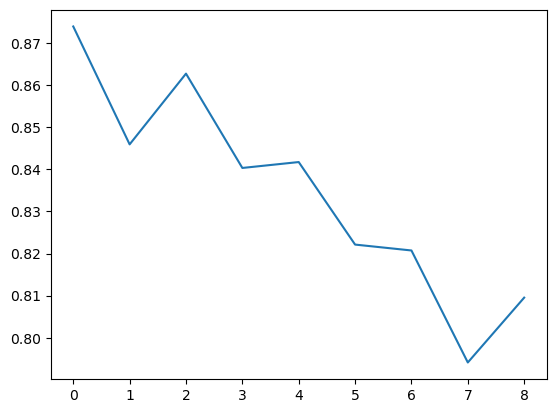

In [15]:
plt.plot(score)